In [1]:
import pandas as pd 
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.stats as stats
sns.set()

In [2]:
file_name = 'LocalPayDemo.csv'

In [3]:

df = pd.read_csv(file_name)

In [4]:
df.head()

,Data Year,Agency Name,Equal Employment Opportunity (EEO)-4 Job Category,Pay Band,Lower Pay Band Bound,Upper Pay Band Bound,Employee Status,Race,Ethnicity,Gender,Number of Employees
0,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Black or African American,Non-Hispanic or Latino,Female,<5
1,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Native Hawaiian or Pacific Islander,Hispanic or Latino,Female,<5
2,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Hispanic or Latino,Female,<5
3,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Unknown or Choose Not to Disclose,Female,<5
4,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,White,Non-Hispanic or Latino,Female,<5


In [5]:
def inspect_dataframe(input_df):
    
    # Basic Info
    print("Basic Info:")
    print(input_df.info())
    print("-" * 50)
    
    # Missing Values
    print("Missing Values Count:")
    print(input_df.isnull().sum())
    print("-" * 50)
   
    
    # Summary Statistics
    print("Summary Statistics:")
    print(input_df.describe())
    print("-" * 50)
    
    #Duplicates
    print("Duplicates present:")
    print(input_df.duplicated().sum())
    
    return "Inspection Done"
    
    


inspect_dataframe(df)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76167 entries, 0 to 76166
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Data Year                                          76167 non-null  int64  
 1   Agency Name                                        76167 non-null  object 
 2   Equal Employment Opportunity (EEO)-4 Job Category  76167 non-null  object 
 3   Pay Band                                           76167 non-null  object 
 4   Lower Pay Band Bound                               76167 non-null  float64
 5   Upper Pay Band Bound                               76167 non-null  float64
 6   Employee Status                                    76167 non-null  object 
 7   Race                                               76167 non-null  object 
 8   Ethnicity                                          76167 non-null  object 

'Inspection Done'

In [6]:

def clean_column_names(df):
    # Create a dictionary to map old column names to new column names
    column_mapping = {col: col.lower().replace(' ', '_') for col in df.columns}
    
    # Rename the DataFrame columns using the mapping
    df.rename(columns=column_mapping, inplace=True)
    
    return df  # Return the modified DataFrame

# Assuming 'df' is your original dataset
df = clean_column_names(df)

In [7]:
df.head()

,data_year,agency_name,equal_employment_opportunity_(eeo)-4_job_category,pay_band,lower_pay_band_bound,upper_pay_band_bound,employee_status,race,ethnicity,gender,number_of_employees
0,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Black or African American,Non-Hispanic or Latino,Female,<5
1,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Native Hawaiian or Pacific Islander,Hispanic or Latino,Female,<5
2,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Hispanic or Latino,Female,<5
3,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Unknown or Choose Not to Disclose,Female,<5
4,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,White,Non-Hispanic or Latino,Female,<5


In [8]:

df.rename(columns={'equal_employment_opportunity_(eeo)-4_job_category': 'job_category'}, inplace=True)


In [9]:
# Save the DataFrame to a new CSV file with updated column names
df.to_csv('cleaned_dataset.csv', index=False)


df.head()

,data_year,agency_name,job_category,pay_band,lower_pay_band_bound,upper_pay_band_bound,employee_status,race,ethnicity,gender,number_of_employees
0,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Black or African American,Non-Hispanic or Latino,Female,<5
1,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Native Hawaiian or Pacific Islander,Hispanic or Latino,Female,<5
2,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Hispanic or Latino,Female,<5
3,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,Unknown or Choose Not to Disclose,Unknown or Choose Not to Disclose,Female,<5
4,2018,ADMINISTRATION FOR CHILDREN'S SERVICES,ADMINISTRATIVE SUPPORT,30000-34999,30000.0,34999.0,Full-Time,White,Non-Hispanic or Latino,Female,<5


In [10]:
columns_check = ['gender', 'employee_status', 'ethnicity', 'race', 'job_category', 'data_year']

unique_values = {}
for column in columns_check:
    unique_values[column] = df[column].unique()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}': {values}")


Unique values in column 'gender': ['Female' 'Male' 'Unknown or Choose Not to Disclose' 'Non-binary'
 'Other Gender']
Unique values in column 'employee_status': ['Full-Time' 'Part-Time' 'Seasonal']
Unique values in column 'ethnicity': ['Non-Hispanic or Latino' 'Hispanic or Latino'
 'Unknown or Choose Not to Disclose']
Unique values in column 'race': ['Black or African American' 'Native Hawaiian or Pacific Islander'
 'Unknown or Choose Not to Disclose' 'White' 'Two or More Races' 'Asian'
 'American Indian or Alaska Native']
Unique values in column 'job_category': ['ADMINISTRATIVE SUPPORT' 'OFFICIALS AND ADMINISTRATORS'
 'PARA-PROFESSIONALS' 'PROFESSIONALS' 'PROTECTIVE SERVICE'
 'SERVICE AND MAINTENANCE' 'SKILLED CRAFT' 'TECHNICIANS']
Unique values in column 'data_year': [2018 2019 2020 2021]


In [11]:
# columns = ['gender', 'employee_status', 'ethnicity', 'race']

# df_encoded = pd.get_dummies(df, columns=columns, drop_first=False)

# # List of unwanted columns to drop
# columns_to_drop = [
#     'gender_Unknown or Choose Not to Disclose',
#     'gender_Other Gender',
#     'ethnicity_Unknown or Choose Not to Disclose',
#     'race_Unknown or Choose Not to Disclose'
# ]

# # Drop the unwanted columns
# df_encoded = df_encoded.drop(columns_to_drop, axis=1)
# df_encoded = clean_column_names(df_encoded)
# df_encoded.head()


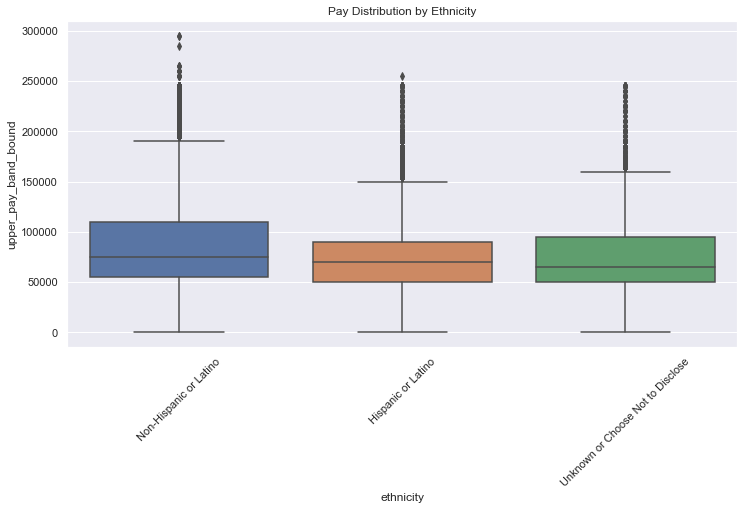

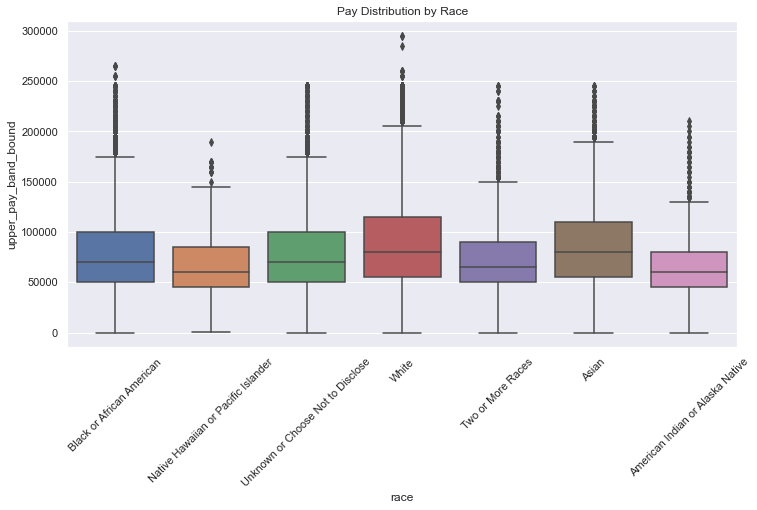

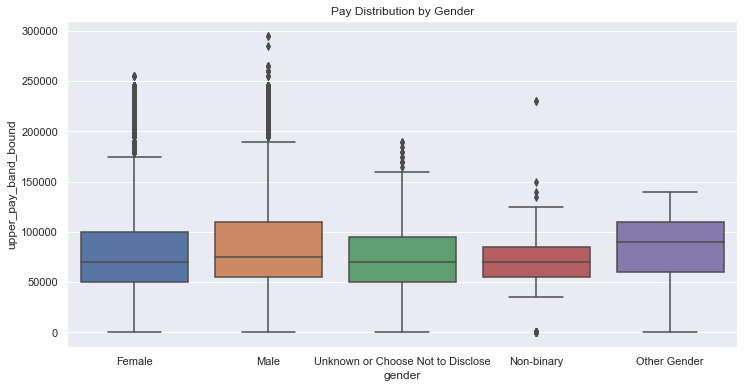

In [12]:

# Create box plots for pay by ethnicity, race, and gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='ethnicity', y='upper_pay_band_bound', data=df)
plt.title('Pay Distribution by Ethnicity')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='upper_pay_band_bound', data=df)
plt.title('Pay Distribution by Race')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='upper_pay_band_bound', data=df)
plt.title('Pay Distribution by Gender')

plt.show()

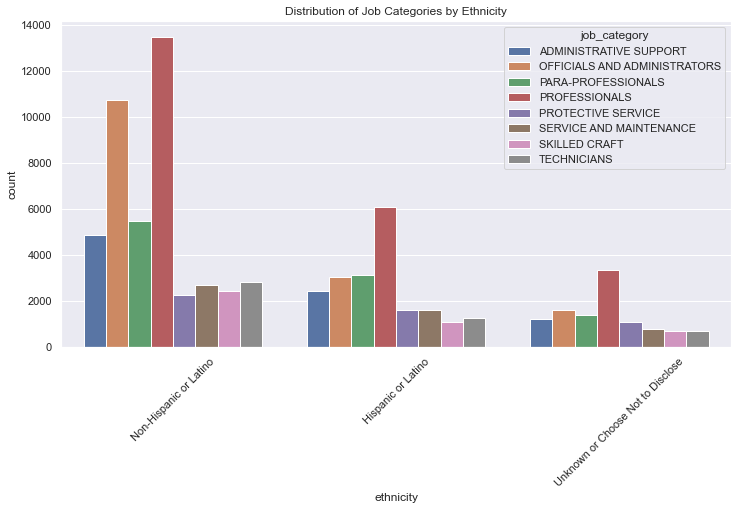

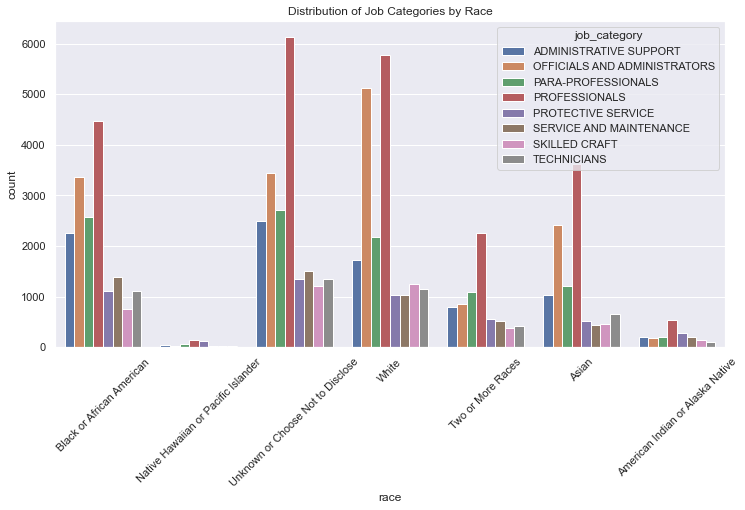

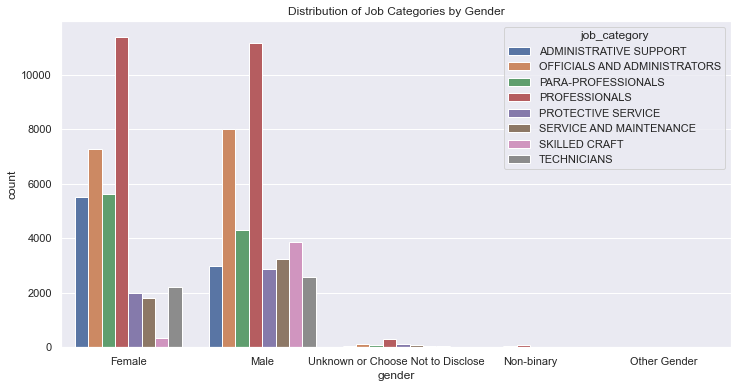

In [13]:
# Create bar plots for job categories by ethnicity, race, and gender
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', hue='job_category', data=df)
plt.title('Distribution of Job Categories by Ethnicity')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='job_category', data=df)
plt.title('Distribution of Job Categories by Race')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='job_category', data=df)
plt.title('Distribution of Job Categories by Gender')

plt.show()

In [14]:
df.job_category.value_counts()

PROFESSIONALS                   22950
OFFICIALS AND ADMINISTRATORS    15422
PARA-PROFESSIONALS              10031
ADMINISTRATIVE SUPPORT           8555
SERVICE AND MAINTENANCE          5127
PROTECTIVE SERVICE               4993
TECHNICIANS                      4836
SKILLED CRAFT                    4253
Name: job_category, dtype: int64

In [15]:
df.gender.value_counts()

Male                                 38976
Female                               36119
Unknown or Choose Not to Disclose      811
Non-binary                             186
Other Gender                            75
Name: gender, dtype: int64